In [8]:
!ls -l ./src
!ls -l ../src

ls: cannot access './src': No such file or directory


In [5]:
import sys, os
import json
import torch

# Make sure src/ is visible
project_root = os.path.abspath(".")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.config import config
from src.training.train import train_model

ModuleNotFoundError: No module named 'src'

In [2]:
def build_config(overrides=None):
    cfg = config.copy()
    if overrides:
        cfg.update(overrides)
    return cfg

def show_config(cfg):
    for k, v in cfg.items():
        print(f"{k}: {v}")

In [3]:
import json
import os
import matplotlib.pyplot as plt

def plot_metrics(tokenizer_name: str, model_type: str, results_dir: str = "results"):
    """
    Load training metrics from JSON, plot training vs validation loss,
    auto-tighten the y-axis, and save the figure to results/pictures.
    """

    # ---- paths ----
    metrics_path = f"{results_dir}/metrics_{tokenizer_name}_{model_type}.json"
    pictures_dir = f"{results_dir}/pictures"
    os.makedirs(pictures_dir, exist_ok=True)

    # ---- load JSON ----
    with open(metrics_path, "r") as f:
        metrics = json.load(f)

    epochs = [m["epoch"] for m in metrics]
    train_losses = [m["train_loss"] for m in metrics]
    val_losses = [m["val_loss"] for m in metrics]

    # ---- plotting ----
    plt.figure(figsize=(7, 5))
    plt.plot(epochs, train_losses, marker="o", label="Train Loss")
    plt.plot(epochs, val_losses, marker="o", label="Validation Loss")

    # ---- tighten Y axis ----
    all_losses = train_losses + val_losses
    low = min(all_losses)
    high = max(all_losses)
    plt.ylim(low - 0.1, high * 2 + 3)

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training vs Validation Loss ({tokenizer_name}-{model_type})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # ---- save file ----
    out_path = f"{pictures_dir}/{tokenizer_name}_{model_type}.png"
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Saved plot to: {out_path}")

In [4]:
def run_training(tokenizer_name, model_type, cfg):
    print("Starting training with config:")
    show_config(cfg)

    # Your train_model already prints metrics and saves files.
    train_model(
        tokenizer_name=tokenizer_name,
        model_type=model_type,
        cfg_overrides=cfg
    )

In [5]:
!python -m src.tokenization.train_word
!python -m src.tokenization.train_unigram
!python -m src.tokenization.train_bpe


[00:00:00] Suffix array seeds             ██████████████████ 75944    /    75944[00:00:00] Suffix array seeds             ██████████████████ 0        /        0
[00:00:02] EM training                    ██████████████████ 20       /       20
[00:00:00] Tokenize words                 ██████████████████ 75944    /    75944[00:00:00] Tokenize words                 ██████████████████ 0        /        0
[00:00:00] Count pairs                    ██████████████████ 75944    /    75944
[00:00:00] Compute merges                 ██████████████████ 3985     /     3985


word transformer

dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='word', model_type='transformer'
pad:0
Loading Wiki2...
Loaded Wiki2: 10000 train, 3760 val 4358 test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


word-transformer epoch 0: 100%|█████████████████████████████████████████████████████████| 17281/17281 [06:24<00:00, 44.93it/s]


Epoch 0: train_loss=6.0440
Epoch 0:
  [VAL] nll/token       = 4.3110 nats
  [VAL] perplexity      = 74.5167
  [VAL] bits per token  = 6.2195
  [VAL] nll/char        = 0.8073 nats
  [VAL] bits per char   = 1.1647 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1626
Saved checkpoint to checkpoints/word_transformer_epoch0.pt
Epoch 1 starting...


word-transformer epoch 1: 100%|████████████████████████████████████████████████████████| 17281/17281 [02:26<00:00, 118.11it/s]


Epoch 1: train_loss=4.5769
Epoch 1:
  [VAL] nll/token       = 4.2428 nats
  [VAL] perplexity      = 69.5996
  [VAL] bits per token  = 6.1210
  [VAL] nll/char        = 0.7945 nats
  [VAL] bits per char   = 1.1463 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1442
Saved checkpoint to checkpoints/word_transformer_epoch1.pt
Epoch 2 starting...


word-transformer epoch 2: 100%|████████████████████████████████████████████████████████| 17281/17281 [02:36<00:00, 110.68it/s]


Epoch 2: train_loss=4.4024
Epoch 2:
  [VAL] nll/token       = 4.2391 nats
  [VAL] perplexity      = 69.3468
  [VAL] bits per token  = 6.1158
  [VAL] nll/char        = 0.7939 nats
  [VAL] bits per char   = 1.1453 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1432
Saved checkpoint to checkpoints/word_transformer_epoch2.pt
Epoch 3 starting...


word-transformer epoch 3: 100%|████████████████████████████████████████████████████████| 17281/17281 [02:30<00:00, 114.55it/s]


Epoch 3: train_loss=4.3217
Epoch 3:
  [VAL] nll/token       = 4.2378 nats
  [VAL] perplexity      = 69.2524
  [VAL] bits per token  = 6.1138
  [VAL] nll/char        = 0.7936 nats
  [VAL] bits per char   = 1.1449 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1428
Saved checkpoint to checkpoints/word_transformer_epoch3.pt
Epoch 4 starting...


word-transformer epoch 4: 100%|████████████████████████████████████████████████████████| 17281/17281 [02:37<00:00, 109.75it/s]


Epoch 4: train_loss=4.2913
Epoch 4:
  [VAL] nll/token       = 4.2401 nats
  [VAL] perplexity      = 69.4171
  [VAL] bits per token  = 6.1172
  [VAL] nll/char        = 0.7940 nats
  [VAL] bits per char   = 1.1456 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1435
Saved checkpoint to checkpoints/word_transformer_epoch4.pt
Evaluating on TEST set with final model...
TEST metrics:
  [TEST] nll/token       = 4.1363 nats
  [TEST] perplexity      = 62.5710
  [TEST] bits per token  = 5.9674
  [TEST] nll/char        = 0.7761 nats
  [TEST] bits per char   = 1.1196 bits
  [TEST] tokens per char = 0.1876
  [TEST] bits per byte   = 1.1179


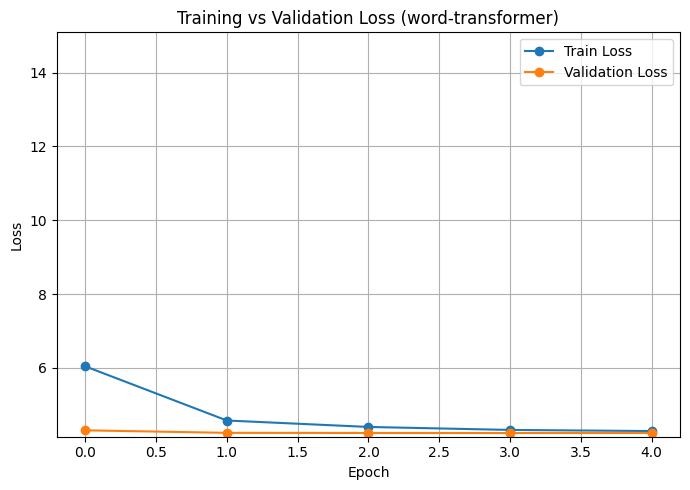

Saved plot to: results/pictures/word_transformer.png


In [6]:
tokenizer_name = "word"          
model_type = "transformer"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

word lstm

dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.0001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.0001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='word', model_type='lstm'
pad:0
Loading Wiki2...
Loaded Wiki2: 10000 train, 3760 val 4358 test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


word-lstm epoch 0: 100%|███████████████████████████████████████████████████████████████| 17281/17281 [01:30<00:00, 191.46it/s]


Epoch 0: train_loss=5.5698
Epoch 0:
  [VAL] nll/token       = 4.6216 nats
  [VAL] perplexity      = 101.6550
  [VAL] bits per token  = 6.6675
  [VAL] nll/char        = 0.8655 nats
  [VAL] bits per char   = 1.2486 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.2463
Saved checkpoint to checkpoints/word_lstm_epoch0.pt
Epoch 1 starting...


word-lstm epoch 1: 100%|███████████████████████████████████████████████████████████████| 17281/17281 [01:26<00:00, 199.81it/s]


Epoch 1: train_loss=4.9018
Epoch 1:
  [VAL] nll/token       = 4.4766 nats
  [VAL] perplexity      = 87.9327
  [VAL] bits per token  = 6.4583
  [VAL] nll/char        = 0.8383 nats
  [VAL] bits per char   = 1.2094 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.2072
Saved checkpoint to checkpoints/word_lstm_epoch1.pt
Epoch 2 starting...


word-lstm epoch 2: 100%|███████████████████████████████████████████████████████████████| 17281/17281 [01:24<00:00, 204.61it/s]


Epoch 2: train_loss=4.7422
Epoch 2:
  [VAL] nll/token       = 4.4308 nats
  [VAL] perplexity      = 84.0021
  [VAL] bits per token  = 6.3924
  [VAL] nll/char        = 0.8298 nats
  [VAL] bits per char   = 1.1971 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1949
Saved checkpoint to checkpoints/word_lstm_epoch2.pt
Epoch 3 starting...


word-lstm epoch 3: 100%|███████████████████████████████████████████████████████████████| 17281/17281 [01:24<00:00, 204.60it/s]


Epoch 3: train_loss=4.6724
Epoch 3:
  [VAL] nll/token       = 4.4151 nats
  [VAL] perplexity      = 82.6864
  [VAL] bits per token  = 6.3696
  [VAL] nll/char        = 0.8268 nats
  [VAL] bits per char   = 1.1928 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1906
Saved checkpoint to checkpoints/word_lstm_epoch3.pt
Epoch 4 starting...


word-lstm epoch 4: 100%|███████████████████████████████████████████████████████████████| 17281/17281 [01:24<00:00, 203.85it/s]


Epoch 4: train_loss=4.6520
Epoch 4:
  [VAL] nll/token       = 4.4130 nats
  [VAL] perplexity      = 82.5147
  [VAL] bits per token  = 6.3666
  [VAL] nll/char        = 0.8264 nats
  [VAL] bits per char   = 1.1923 bits
  [VAL] tokens per char = 0.1873
  [VAL] bits per byte   = 1.1901
Saved checkpoint to checkpoints/word_lstm_epoch4.pt
Evaluating on TEST set with final model...
TEST metrics:
  [TEST] nll/token       = 4.3148 nats
  [TEST] perplexity      = 74.7973
  [TEST] bits per token  = 6.2249
  [TEST] nll/char        = 0.8096 nats
  [TEST] bits per char   = 1.1679 bits
  [TEST] tokens per char = 0.1876
  [TEST] bits per byte   = 1.1661


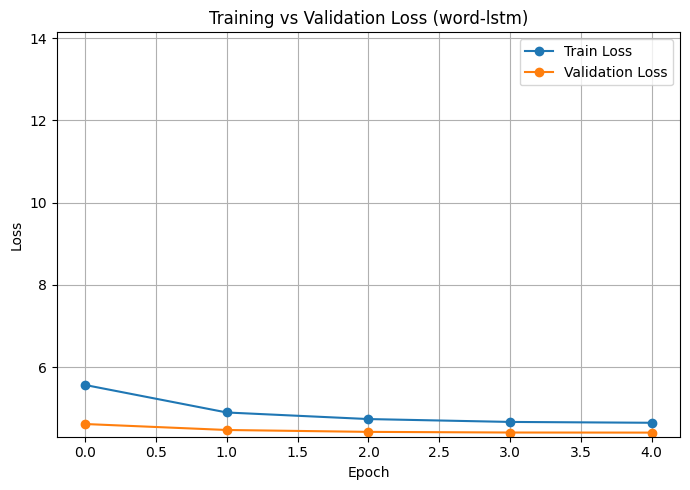

Saved plot to: results/pictures/word_lstm.png


In [7]:
tokenizer_name = "word"   
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

bpe transformer

dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.0005
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.0005
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='bpe', model_type='transformer'
pad:0
Loading Wiki2...
Loaded Wiki2: 10000 train, 3760 val 4358 test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


bpe-transformer epoch 0: 100%|█████████████████████████████████████████████████████████| 42645/42645 [06:06<00:00, 116.30it/s]


Epoch 0: train_loss=4.8250
Epoch 0:
  [VAL] nll/token       = 3.0849 nats
  [VAL] perplexity      = 21.8642
  [VAL] bits per token  = 4.4505
  [VAL] nll/char        = 1.4296 nats
  [VAL] bits per char   = 2.0624 bits
  [VAL] tokens per char = 0.4634
  [VAL] bits per byte   = 2.0587
Saved checkpoint to checkpoints/bpe_transformer_epoch0.pt
Epoch 1 starting...


bpe-transformer epoch 1: 100%|██████████████████████████████████████████████████████████| 42645/42645 [07:18<00:00, 97.18it/s]


Epoch 1: train_loss=3.6719
Epoch 1:
  [VAL] nll/token       = 2.9521 nats
  [VAL] perplexity      = 19.1454
  [VAL] bits per token  = 4.2589
  [VAL] nll/char        = 1.3680 nats
  [VAL] bits per char   = 1.9737 bits
  [VAL] tokens per char = 0.4634
  [VAL] bits per byte   = 1.9700
Saved checkpoint to checkpoints/bpe_transformer_epoch1.pt
Epoch 2 starting...


bpe-transformer epoch 2: 100%|██████████████████████████████████████████████████████████| 42645/42645 [07:59<00:00, 88.90it/s]


Epoch 2: train_loss=3.5594
Epoch 2:
  [VAL] nll/token       = 2.9146 nats
  [VAL] perplexity      = 18.4406
  [VAL] bits per token  = 4.2048
  [VAL] nll/char        = 1.3507 nats
  [VAL] bits per char   = 1.9486 bits
  [VAL] tokens per char = 0.4634
  [VAL] bits per byte   = 1.9450
Saved checkpoint to checkpoints/bpe_transformer_epoch2.pt
Epoch 3 starting...


bpe-transformer epoch 3: 100%|██████████████████████████████████████████████████████████| 42645/42645 [08:10<00:00, 86.98it/s]


Epoch 3: train_loss=3.5110
Epoch 3:
  [VAL] nll/token       = 2.8968 nats
  [VAL] perplexity      = 18.1162
  [VAL] bits per token  = 4.1792
  [VAL] nll/char        = 1.3424 nats
  [VAL] bits per char   = 1.9367 bits
  [VAL] tokens per char = 0.4634
  [VAL] bits per byte   = 1.9332
Saved checkpoint to checkpoints/bpe_transformer_epoch3.pt
Epoch 4 starting...


bpe-transformer epoch 4: 100%|██████████████████████████████████████████████████████████| 42645/42645 [07:21<00:00, 96.57it/s]


Epoch 4: train_loss=3.4934
Epoch 4:
  [VAL] nll/token       = 2.8935 nats
  [VAL] perplexity      = 18.0566
  [VAL] bits per token  = 4.1745
  [VAL] nll/char        = 1.3409 nats
  [VAL] bits per char   = 1.9345 bits
  [VAL] tokens per char = 0.4634
  [VAL] bits per byte   = 1.9310
Saved checkpoint to checkpoints/bpe_transformer_epoch4.pt
Evaluating on TEST set with final model...
TEST metrics:
  [TEST] nll/token       = 2.9091 nats
  [TEST] perplexity      = 18.3410
  [TEST] bits per token  = 4.1970
  [TEST] nll/char        = 1.3652 nats
  [TEST] bits per char   = 1.9696 bits
  [TEST] tokens per char = 0.4693
  [TEST] bits per byte   = 1.9664


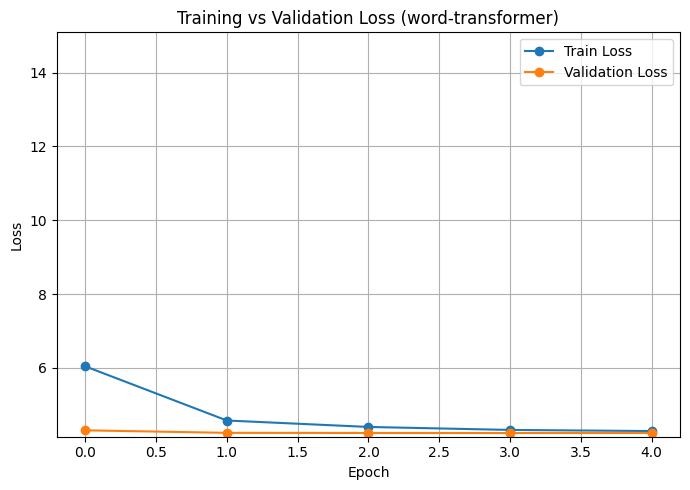

Saved plot to: results/pictures/word_transformer.png


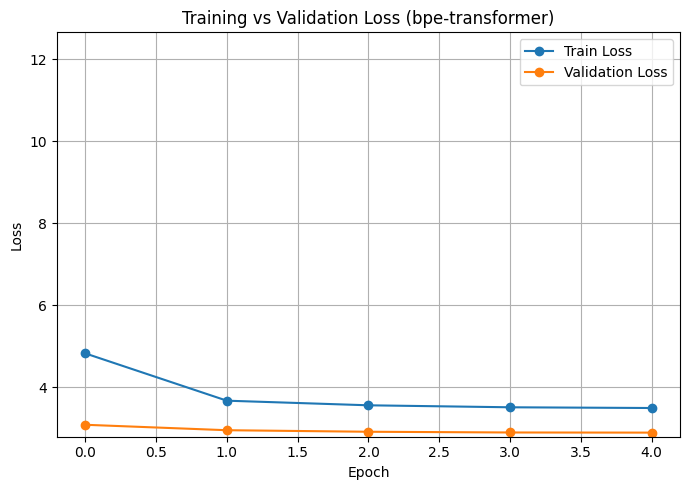

Saved plot to: results/pictures/bpe_transformer.png


In [8]:
tokenizer_name = "bpe"        
model_type = "transformer"     

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 5e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics("word", "transformer")
plot_metrics(tokenizer_name, model_type)

bpe lstm

In [1]:
tokenizer_name = "bpe"      
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

NameError: name 'build_config' is not defined

In [ ]:
!python -m src.tokenization.train_unigram

unigram transformer

In [ ]:
tokenizer_name = "unigram"       
model_type = "transformer"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

unigram lstm

In [ ]:
tokenizer_name = "unigram"    
model_type = "lstm"       

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

byte transformer

In [5]:
tokenizer_name = "byte"         
model_type = "transformer"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
# show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='byte', model_type='transformer'
pad:0
Loading Wiki2...
Loaded Wiki2: 36718 train, 3760 val 4358 test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


byte-transformer epoch 0:   0%|                                                        | 691/342233 [00:16<2:12:42, 42.89it/s]


KeyboardInterrupt: 

byte lstm

In [ ]:
tokenizer_name = "byte"         
model_type = "lstm"      

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

In [ ]:
tokenizers = ["word", "bpe", "unigram", "byte"]
model_types = ["transformer", "lstm"]

for tok in tokenizers:
    for model in model_types:
        print(f"Plotting {tok}-{model}...")
        plot_metrics(tok, model)   # uses your previous function